In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

### 读取数据

In [3]:
path = './data/descriptor_binary.csv'
df = pd.read_csv(path)
print(df.shape)
display(df.head())
x = df.drop(['shell_number'], axis=1)
y = df['shell_number']
print(x.shape, y.shape)
print(y.value_counts())

(316, 35)


,Li,C,O,Mg,Si,Ca,Ti,V,Cr,Mn,...,acid,water,ethanol,glycol,acetone,cms,adsorption,heat1,heat2,shell_number
0,0.0,0.0000,0.5714,0.0,0.0,0.0000,0.0,0.0,0.0,0.0000,...,0,1.000,0.000,0.0,0.0,0,-0.442356,-0.082689,-0.097866,0
1,0.0,0.2000,0.6000,0.0,0.0,0.2000,0.0,0.0,0.0,0.0000,...,0,0.333,0.667,0.0,0.0,0,0.098284,-0.117065,-0.096148,1
2,0.0,0.1429,0.5714,0.0,0.0,0.1429,0.0,0.0,0.0,0.1429,...,0,0.333,0.667,0.0,0.0,0,0.117059,-0.117065,-0.096148,1
3,0.0,0.1429,0.5714,0.0,0.0,0.1429,0.0,0.0,0.0,0.1429,...,0,0.333,0.667,0.0,0.0,0,0.145208,-0.117065,-0.096148,1
4,0.0,0.1429,0.5714,0.0,0.0,0.1429,0.0,0.0,0.0,0.1429,...,0,0.333,0.667,0.0,0.0,0,0.106326,-0.117065,-0.096148,1


(316, 34) (316,)
shell_number
1    237
0     79
Name: count, dtype: int64


### 数据分析

(35, 35)


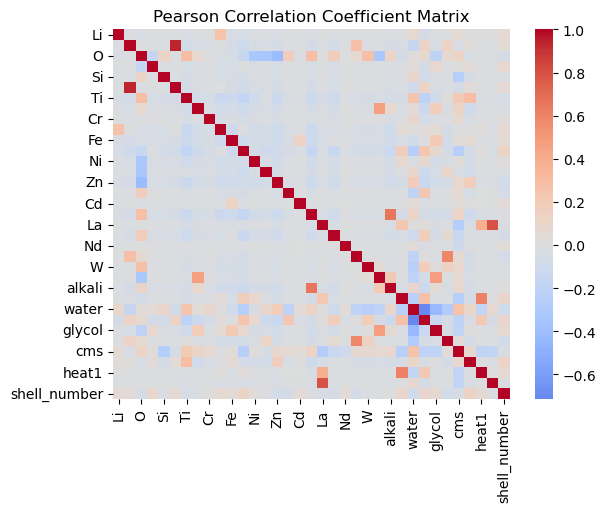

In [5]:
from data_analysis import plt_pearsonr
plt_pearsonr(df)

### 分割数据

In [6]:
random_state = 11
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
print(x_train.shape, y_train.shape)
print(y_train.value_counts())

(252, 34) (252,)
shell_number
1    187
0     65
Name: count, dtype: int64


In [7]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=random_state)
x_resampled, y_resampled = ros.fit_resample(x_train, y_train)
print(x_resampled.shape, y_resampled.shape)
print(y_resampled.value_counts())

(374, 34) (374,)
shell_number
0    187
1    187
Name: count, dtype: int64


### 常用模型构建

In [8]:

# 神经网络模型
mlp = MLPClassifier(
    activation='relu',
    solver='adam', 
    hidden_layer_sizes=(4), 
    max_iter=1000,
    random_state=random_state
)
# 随机森林模型
rf = RandomForestClassifier(random_state=random_state)
# 梯度提升树模型
gbdt = GradientBoostingClassifier(random_state=random_state)
# 支持向量机
svc = SVC(random_state=random_state)
# k-近邻方法
knn = KNeighborsClassifier()

models = {
    'mlp':mlp,
    'rf':rf,
    'gbdt':gbdt,
    'svc':svc,
}

In [9]:
from evaluate import model_evaluate
for name, model in models.items():
    print('***********************')
    print(f'model: {name}')
    model_evaluate(x_resampled, y_resampled, x_test, y_test, model)
print('***********************')

***********************
model: mlp
accuracy:0.5625, recall:0.62, precision:0.775, f1:0.6888888888888889 
confusion matrix:
 [[ 5  9]
 [19 31]]
***********************
model: rf
accuracy:0.65625, recall:0.78, precision:0.78, f1:0.78 
confusion matrix:
 [[ 3 11]
 [11 39]]
***********************
model: gbdt
accuracy:0.609375, recall:0.66, precision:0.8048780487804879, f1:0.7252747252747253 
confusion matrix:
 [[ 6  8]
 [17 33]]
***********************
model: svc
accuracy:0.515625, recall:0.52, precision:0.7878787878787878, f1:0.6265060240963856 
confusion matrix:
 [[ 7  7]
 [24 26]]
***********************


In [10]:

from sklearn.model_selection import cross_validate, StratifiedKFold

skf = StratifiedKFold(n_splits=10,shuffle=True, random_state=2)
scoring = {
    'accuracy': 'accuracy',
    'recall': 'recall_macro',  # 或者使用'recall_micro', 'recall_weighted'等
    'precision': 'precision_macro',  # 或者使用'precision_micro', 'precision_weighted'等
    'f1': 'f1_macro',  # 或者使用'f1_micro', 'f1_weighted'等
}

# 训练并评估模型
results = {}
for name, model in models.items():
    eva = {}
    cv_results = cross_validate(model, x, y, cv=skf, scoring=scoring)
    eva['accuracy'] = cv_results['test_accuracy'].mean()
    eva['recall'] = cv_results['test_recall'].mean()
    eva['precision'] = cv_results['test_precision'].mean()
    eva['f1'] = cv_results['test_f1'].mean()
    results[name] = eva
for result in results:
    print('{}: {}'.format(result, results[result]))

C:\Users\wxf\.conda\envs\shell-number-prediction\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\wxf\.conda\envs\shell-number-prediction\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\wxf\.conda\envs\shell-number-prediction\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

mlp: {'accuracy': 0.7372983870967742, 'recall': 0.49148550724637685, 'precision': 0.37333333333333335, 'f1': 0.42431275921841954}
rf: {'accuracy': 0.7055443548387098, 'recall': 0.5626682194616979, 'precision': 0.5846333111333111, 'f1': 0.5606839717712023}
gbdt: {'accuracy': 0.7434475806451614, 'recall': 0.5968944099378881, 'precision': 0.6419851444851444, 'f1': 0.6043915412318774}
svc: {'accuracy': 0.7500000000000001, 'recall': 0.5, 'precision': 0.37500000000000006, 'f1': 0.4285569985569985}


C:\Users\wxf\.conda\envs\shell-number-prediction\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\wxf\.conda\envs\shell-number-prediction\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\wxf\.conda\envs\shell-number-prediction\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

(35, 35)


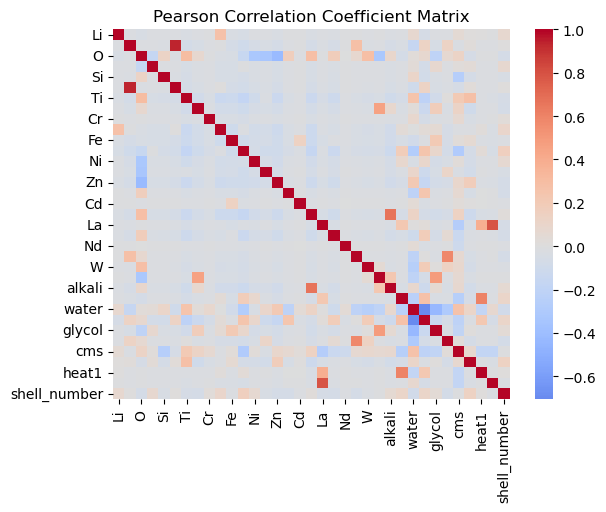

In [11]:
df1 = pd.read_csv('./data/descriptor.csv')
plt_pearsonr(df1)